In [ ]:
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import btk
import btk.plot_utils
import btk.survey
import btk.draw_blends
import btk.catalog
import btk.sampling_functions
import astropy.table


In [ ]:
COSMOS_CATALOG_PATHS = "/sps/lsst/users/bbiswas/OneDegSq_snr_10.fits"

stamp_size = 20
min_number = 5
max_number = 5
batch_size = 2
maxshift = 5

catalog = btk.catalog.CatsimCatalog.from_file(COSMOS_CATALOG_PATHS)
survey = btk.survey.get_surveys("LSST")
seed = 5

sampling_function = btk.sampling_functions.DefaultSampling(
    max_number=max_number, min_number=min_number, max_shift=maxshift, stamp_size=stamp_size, seed=seed
)

draw_generator = btk.draw_blends.CatsimGenerator(
    catalog,
    sampling_function,
    survey,
    batch_size=batch_size,
    stamp_size=stamp_size,
    cpus=1,
    add_noise="all",
    augment_data=False,
    verbose=False,
    seed=seed,
)

In [ ]:
blend = next(draw_generator)


Generating blends for LSST survey:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
print(blend['blend_list'][0]['pa_disk'])
print(blend['blend_list'][0]['pa_bulge'])

   pa_disk   
-------------
19.9426746368
59.5872535706
217.709884644
          0.0
20.3898792267
   pa_bulge  
-------------
          0.0
59.5872535706
217.709884644
75.1713180542
          0.0


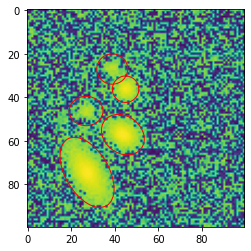

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(np.arcsinh(blend['blend_images'][0, 2]))

# plot an ellipse for each object
for i in range(len(blend["blend_list"][0])):

    e = Ellipse(xy=(blend["blend_list"][0]['x_peak'][i], 
                    blend["blend_list"][0]['y_peak'][i]),
                width=3*5*(blend["blend_list"][0]["a_d"][i]+.81),
                height=3*5*(blend["blend_list"][0]["b_d"][i]+.81),
                angle=blend['blend_list'][0]['pa_bulge'][i],
               )

    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [ ]:
COSMOS_CATALOG_PATHS = "/sps/lsst/users/bbiswas/OneDegSq_snr_10.fits"

stamp_size = 20
min_number = 5
max_number = 5
batch_size = 2
maxshift = 5

catalog = btk.catalog.CatsimCatalog.from_file(COSMOS_CATALOG_PATHS)
survey = btk.survey.get_surveys("LSST")
seed = 5

sampling_function = btk.sampling_functions.DefaultSampling(
    max_number=max_number, min_number=min_number, max_shift=maxshift, stamp_size=stamp_size, seed=seed
)

draw_generator_rot = btk.draw_blends.CatsimGenerator(
    catalog,
    sampling_function,
    survey,
    batch_size=batch_size,
    stamp_size=stamp_size,
    cpus=1,
    add_noise="all",
    augment_data=True,
    verbose=False,
    seed=seed,
)

In [ ]:
blend_rot = next(draw_generator_rot)

Generating blends for LSST survey:   0%|          | 0/2 [00:00<?, ?it/s]

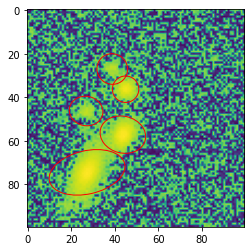

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(np.arcsinh(blend_rot['blend_images'][0, 2]))

# plot an ellipse for each object
for i in range(len(blend_rot["blend_list"][0])):

    e = Ellipse(xy=(blend_rot["blend_list"][0]['x_peak'][i], 
                    blend_rot["blend_list"][0]['y_peak'][i]),
                width=3*5*(blend_rot["blend_list"][0]["a_d"][i]+.81),
                height=3*5*(blend_rot["blend_list"][0]["b_d"][i]+.81),
                angle=(blend_rot['blend_list'][0]['pa_disk'][i]))

    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [ ]:
blend_rot['blend_list'][0]

galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,r_band_snr,ref_mag,btk_size,x_peak,y_peak,btk_rotation,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
402703472042,-2.141986199118584,-4.51242289272832,0.77157497406,0.0,2.954887051e-18,0.0,0.0,0.138286501169,0.0,0.119149699807,23.760463892790483,43.70313852959032,25.9608764648,26.00963974,25.7259178162,25.0243339539,24.8009719849,24.6806259155,21.696645542538047,25.0243339539,0.6444150954475399,38.790069004063,26.937885531565513,303.96007731546507,0.0,0.0,0.0,0.0,0.0,0.0
402700240253,-4.460692976183436,4.991761150650714,0.914744019508,2.37857307152e-17,1.78288801929e-16,0.0,0.318388104439,1.5569961071,0.240179300308,0.515343308449,167.03429928291484,167.03429928291484,23.4625492096,23.2739944458,22.4205322266,21.5333938599,20.9387874603,20.6765918732,300.717562423154,21.5333938599,6.817082704656375,27.196535115484526,74.45880576403519,257.9078409520525,0.0,0.0,0.0,0.0,0.0,0.0
2200587295,-1.1663111921448177,1.5236911158798776,0.960042715073,1.92055505481e-19,4.54166096126e-17,0.0,0.0737358033657,0.601813793182,0.0705519020557,0.316828101873,14.033145698027113,14.033145698027113,23.3596992493,23.4161586761,23.1287136078,22.6084156036,22.1751060486,22.0533370972,205.0061138790726,22.6084156036,2.798550071436422,43.66844403928944,57.118455579616636,326.05387684233784,0.0,0.0,0.0,0.0,0.0,0.0
402701510414,-0.9152679458000135,-2.6548979833017605,1.65693128109,4.62944202961e-18,0.0,0.0,0.216405600309,0.0,0.197576805949,0.0,254.00237780760858,178.83105975340862,23.6485843658,23.7829990387,23.8785896301,23.9827384949,24.0727005005,24.0288581848,117.78024939267046,23.9827384949,0.31595217645114,44.92366027101349,36.22551008269076,29.805176625568105,0.0,0.0,0.0,0.0,0.0,0.0
2202938784,-4.547248060975548,-0.6505244777485792,0.658364295959,0.0,6.23620686868e-18,0.0,0.0,0.226535096765,0.0,0.0903993993998,350.7011506734988,11.091029900198748,27.1911449432,26.4948291779,25.5733547211,24.8124027252,24.5402793884,24.3211116791,24.882284240179565,24.8124027252,1.0556535509249,26.763759691134428,46.24737761051004,238.45019177891646,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(blend_rot['blend_list'][0]['pa_disk'])
print(blend_rot['blend_list'][0]['pa_bulge'])
print(blend_rot['blend_list'][0]['btk_rotation'])

     pa_disk      
------------------
 43.70313852959032
167.03429928291484
14.033145698027113
178.83105975340862
11.091029900198748
     pa_bulge     
------------------
23.760463892790483
167.03429928291484
14.033145698027113
254.00237780760858
 350.7011506734988
   btk_rotation   
------------------
303.96007731546507
 257.9078409520525
326.05387684233784
29.805176625568105
238.45019177891646
